# Lecture 7: Extracting Data Part 2 - Downloading Datasets via URL

## Objective:
This lecture will guide you through downloading datasets directly from a URL using Python. We will use the AWA2 dataset as an example.

---

## Step 1: Identify the Dataset URL
To download a dataset using Python, you need to know the direct download URL. For the AWA2 dataset, the URL is:


In [2]:
import pandas as pd
import zipfile
import os
import requests

# URL to the dataset
url = "https://cvml.ist.ac.at/AwA2/AwA2-base.zip"
save_path = "./AwA2-base.zip"

# Download the dataset
print("Downloading the dataset...")
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(save_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Download complete.")
else:
    print(f"Failed to download the dataset. HTTP Status Code: {response.status_code}")
    exit()

# Extract the dataset
print("Extracting the dataset...")
with zipfile.ZipFile(save_path, "r") as zip_ref:
    zip_ref.extractall("./AwA2-base")
print("Extraction complete.")

# Dynamically locate files
extracted_path = "./AwA2-base"
attributes_file = None
classes_file = None

for root, dirs, files in os.walk(extracted_path):
    for file in files:
        if file == "predicate-matrix-continuous.txt":
            attributes_file = os.path.join(root, file)
        if file == "classes.txt":
            classes_file = os.path.join(root, file)

if not attributes_file or not classes_file:
    print("Required files are missing. Please check the dataset structure.")
    exit()

# Load the attribute file
print("Loading attributes file...")
try:
    attributes = pd.read_csv(attributes_file, header=None, delim_whitespace=True)  # Handle irregular delimiters
    print("Attributes DataFrame:")
    print(attributes.head())
except Exception as e:
    print(f"Error loading attributes file: {e}")

# Load the class file
print("Loading classes file...")
try:
    classes = pd.read_csv(classes_file, header=None, sep="\t")
    print("Classes DataFrame:")
    print(classes.head())
except Exception as e:
    print(f"Error loading classes file: {e}")


Download complete.
Extracting the dataset...
Extraction complete.
Loading attributes file...
Attributes DataFrame:
      0      1    2      3      4    5    6    7      8       9   ...     75  \
0  -1.00  -1.00 -1.0  -1.00  12.34  0.0  0.0  0.0  16.11    9.19  ...   0.00   
1  39.25   1.39  0.0  74.14   3.75  0.0  0.0  0.0   1.25    0.00  ...   7.64   
2  83.40  64.79  0.0   0.00   1.25  0.0  0.0  0.0  68.49   32.69  ...  79.49   
3  19.38   0.00  0.0  87.81   7.50  0.0  0.0  0.0   0.00    7.50  ...  65.62   
4  69.58  73.33  0.0   6.39   0.00  0.0  0.0  0.0  37.08  100.00  ...   1.25   

     76     77     78     79     80     81     82     83     84  
0  0.00   1.23  10.49  39.24  17.57  50.59   2.35   9.70   8.38  
1  9.79  53.14  61.80  12.50  24.00   3.12  58.64  20.14  11.39  
2  0.00   0.00  38.27   9.77  52.03  24.94  15.77  13.41  15.42  
3  0.00   0.00   3.75  31.88  41.88  23.44  31.88  33.44  13.12  
4  6.25   0.00   9.38  31.67  53.26  24.44  29.38  11.25  72.71  

[5 rows

C:\Users\neloya\AppData\Local\Temp\ipykernel_19740\1041491038.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  attributes = pd.read_csv(attributes_file, header=None, delim_whitespace=True)  # Handle irregular delimiters


Attributes Dataset Shape: (50, 85)
First 5 rows of the Attributes Dataset:
      0      1    2      3      4    5    6    7      8       9   ...     75  \
0  -1.00  -1.00 -1.0  -1.00  12.34  0.0  0.0  0.0  16.11    9.19  ...   0.00   
1  39.25   1.39  0.0  74.14   3.75  0.0  0.0  0.0   1.25    0.00  ...   7.64   
2  83.40  64.79  0.0   0.00   1.25  0.0  0.0  0.0  68.49   32.69  ...  79.49   
3  19.38   0.00  0.0  87.81   7.50  0.0  0.0  0.0   0.00    7.50  ...  65.62   
4  69.58  73.33  0.0   6.39   0.00  0.0  0.0  0.0  37.08  100.00  ...   1.25   

     76     77     78     79     80     81     82     83     84  
0  0.00   1.23  10.49  39.24  17.57  50.59   2.35   9.70   8.38  
1  9.79  53.14  61.80  12.50  24.00   3.12  58.64  20.14  11.39  
2  0.00   0.00  38.27   9.77  52.03  24.94  15.77  13.41  15.42  
3  0.00   0.00   3.75  31.88  41.88  23.44  31.88  33.44  13.12  
4  6.25   0.00   9.38  31.67  53.26  24.44  29.38  11.25  72.71  

[5 rows x 85 columns]
Total Missing Values in A

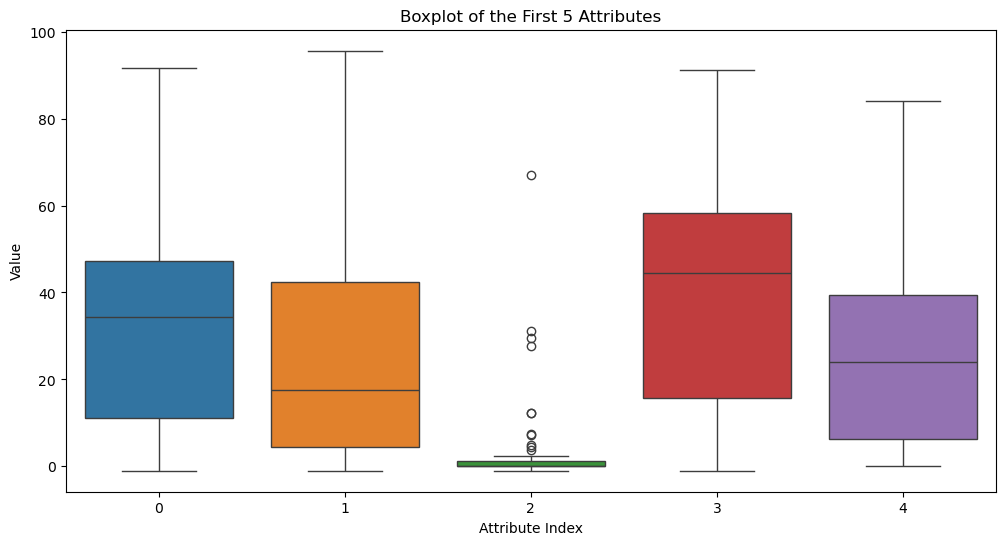

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the structure of the attributes dataset
print(f"Attributes Dataset Shape: {attributes.shape}")
print("First 5 rows of the Attributes Dataset:")
print(attributes.head())

# Check for missing values
missing_values = attributes.isnull().sum().sum()
print(f"Total Missing Values in Attributes Dataset: {missing_values}")

# Visualize the distribution of the first few attributes
plt.figure(figsize=(12, 6))
sns.boxplot(data=attributes.iloc[:, :5])
plt.title("Boxplot of the First 5 Attributes")
plt.xlabel("Attribute Index")
plt.ylabel("Value")
plt.show()


Classes Dataset Shape: (50, 2)
First 5 rows of the Classes Dataset:
   0             1
0  1      antelope
1  2  grizzly+bear
2  3  killer+whale
3  4        beaver
4  5     dalmatian


C:\Users\neloya\AppData\Local\Temp\ipykernel_23428\579082410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=classes[1], x=classes.index, palette="viridis")


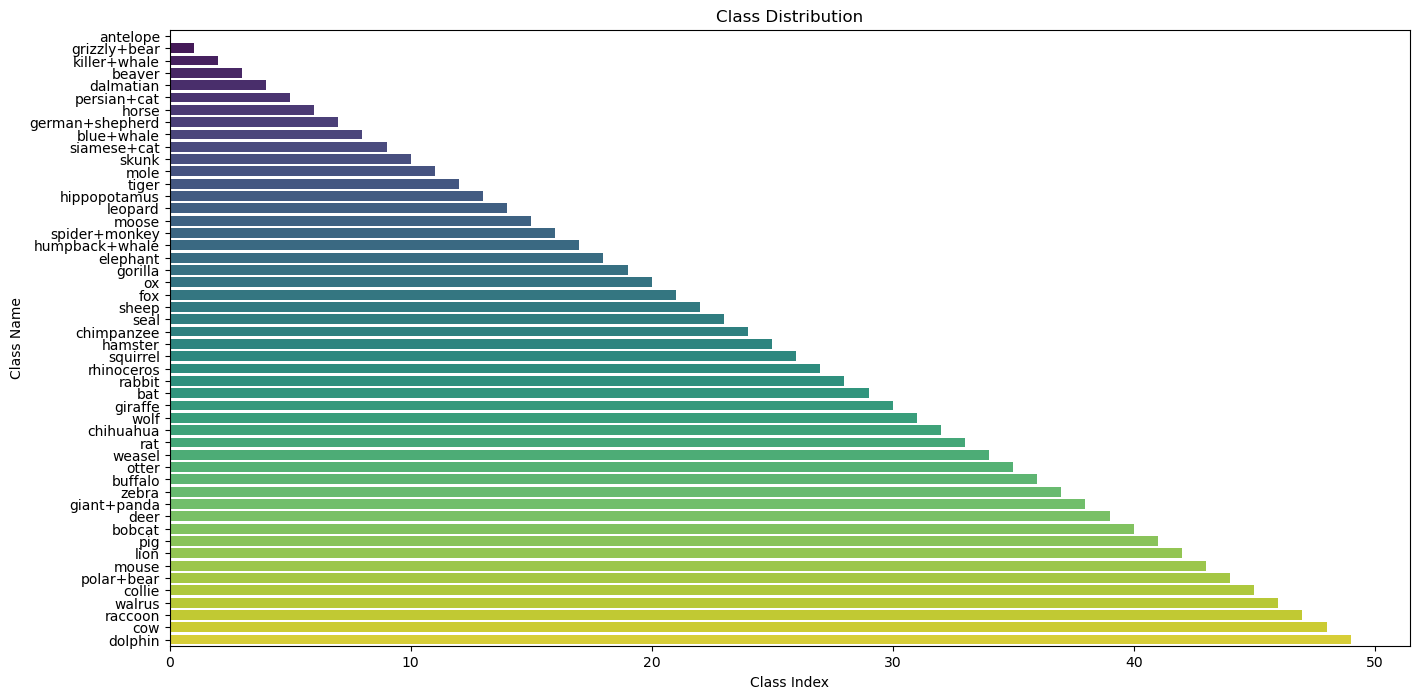

In [12]:
# Check the structure of the classes dataset
print(f"Classes Dataset Shape: {classes.shape}")
print("First 5 rows of the Classes Dataset:")
print(classes.head())

# Visualize the class distribution
classes[1] = classes[1].str.strip()  # Strip extra spaces
plt.figure(figsize=(16, 8))
sns.barplot(y=classes[1], x=classes.index, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class Index")
plt.ylabel("Class Name")
plt.show()


In [18]:
import os

# Print the directory structure to verify paths
for root, dirs, files in os.walk("./AwA2-base"):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Directory: ./AwA2-base
Subdirectories: ['Animals_with_Attributes2']
Files: []
----------------------------------------
Directory: ./AwA2-base\Animals_with_Attributes2
Subdirectories: []
Files: ['classes.txt', 'predicate-matrix-binary.txt', 'predicate-matrix-continuous.txt', 'predicate-matrix.png', 'predicates.txt', 'README-attributes.txt']
----------------------------------------
